In [22]:
#importing libraries
import numpy as np #linear Algebra
import pandas as pd #data processing csv file I/O
import seaborn as sns  #for data visualization
import matplotlib.pyplot as plt #to plot charts 
from collections import Counter
import os

#Modelling Libraries
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split

#Directory Structure
for dirname, _, filenames in os.walk ("./diabetes (1).csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [23]:
#importing dataset
df=pd.read_csv("./diabetes (1).csv")

In [24]:
#Get familiar with dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
#Excepting BMI and DiabetesPedigreeFunction all the other columns are integer values. 
# Outcome is the label containing 1 and 0 values. 
# 1 means person has diabetes and 0 mean person is not diabetic


In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
#Show top level 5 Rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
#Next step I will clean up the data which is an important part of datascience
#Missing data can lead to wrong statistics during modeling and predictions.

#Explore missing data values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
#I have observed there is no missing values in the dataset 
# however the features like Glucose, BloodPressure, Insulin, SkinThickness has 0 values which is not possible. 
# We have to replace 0 values with either mean or median values of specific column.

In [35]:
#corecting missing values with Glucose
df['Glucose']=df['Glucose'].replace(0, df['Glucose'].mean())
#corecting missing values with Blood Pressure
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPresure'].mean())#There are 35 records with 0 BloodPressure in dataset
#correcting missing values with BMI
df['BMI']=df['BMI'].replace(0, df['BMI'].median())

#correcting missing values with Insulin and SkinThickness
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())

KeyError: 'BloodPresure'

In [36]:
#Review Dataset Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,69.105469,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,19.355807,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
#The above results of replacement. Uncomment each and run to see
#df.Glucose.value_counts()
#df.BloodPressure.value_counts()
df.BMI.value_counts()
#df.SkinThickness.value_counts()
#df.Insulin.value_counts()

32.0    24
31.2    12
31.6    12
32.4    10
33.3    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: BMI, Length: 247, dtype: int64

In [38]:
#show top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,30.5,33.6,0.627,50,1
1,1,85.0,66,29,30.5,26.6,0.351,31,0
2,8,183.0,64,23,30.5,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


<Axes: >

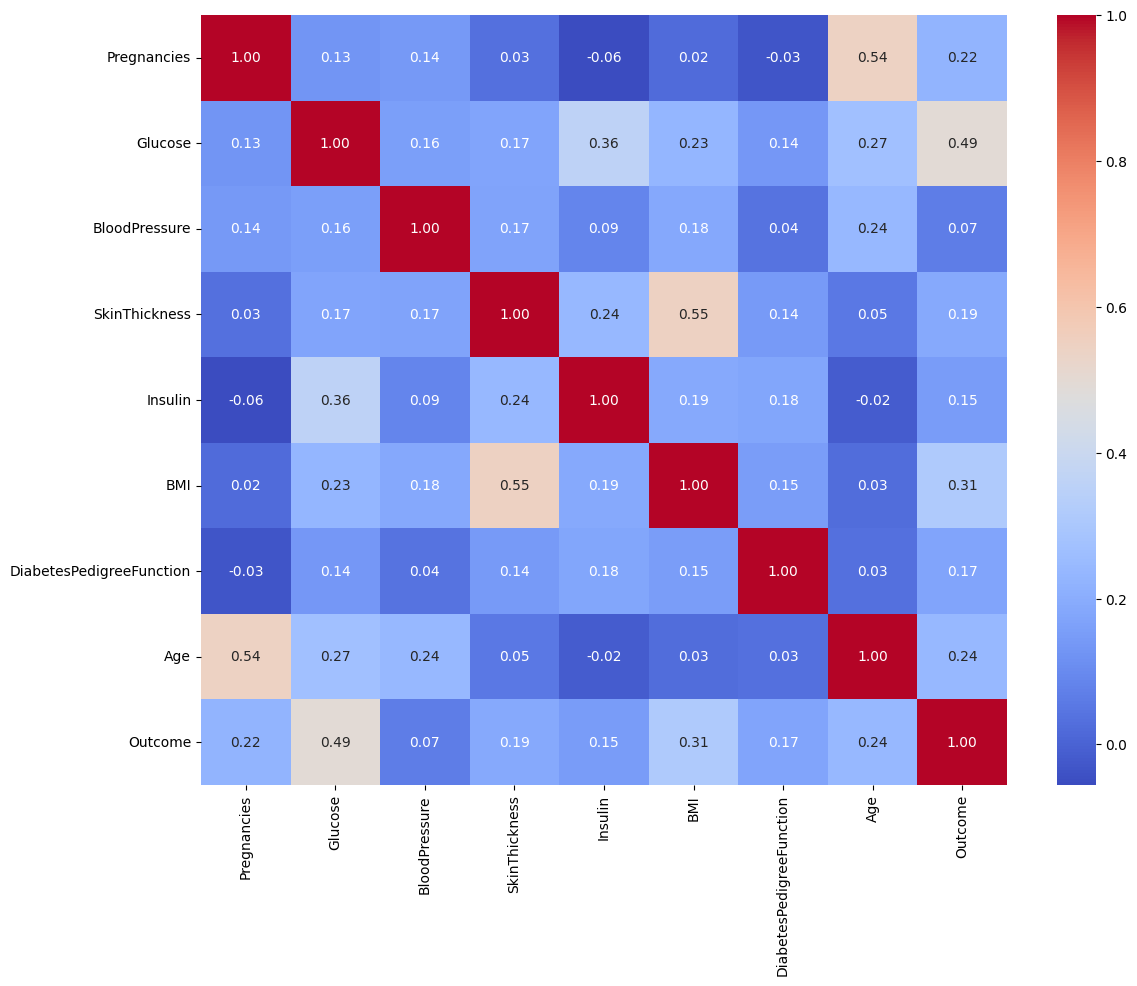

In [39]:
#Correlations
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")

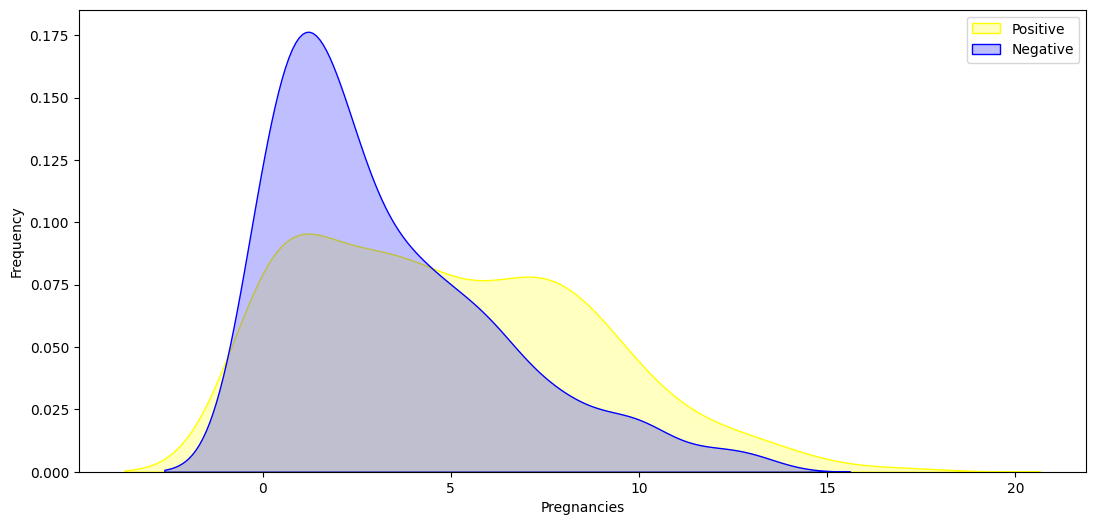

In [40]:
#Explore Pregnancies vs Outcome
plt.figure(figsize=(13,6))
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 1], 
     color="Yellow", fill = True)
g = sns.kdeplot(df["Pregnancies"][df["Outcome"] == 0], 
     ax =g, color="Blue", fill= True)
g.set_xlabel("Pregnancies")
g.set_ylabel("Frequency")
g.legend(["Positive","Negative"])

In [41]:
#Outcome has 1 and 0 values where 1 indicates that person has diabetes and 0 shows person has no diabetes. 
# This is my label column in dataset.

<Axes: xlabel='Outcome', ylabel='count'>

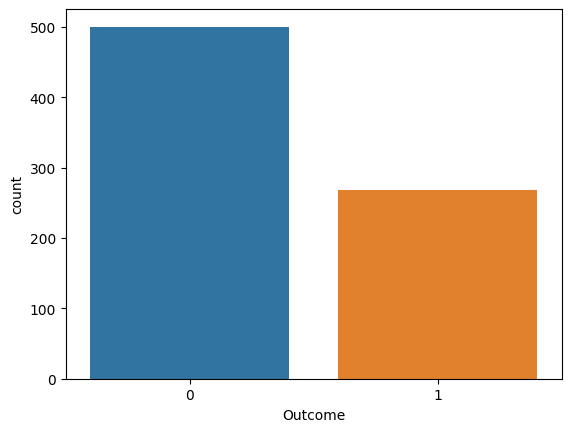

In [42]:
sns.countplot(x='Outcome', data=df)

In [43]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,30.5,33.6,0.627,50,1
1,1,85.0,66,29,30.5,26.6,0.351,31,0
2,8,183.0,64,23,30.5,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76,48,180.0,32.9,0.171,63,0
764,2,122.0,70,27,30.5,36.8,0.340,27,0
765,5,121.0,72,23,112.0,26.2,0.245,30,0
766,1,126.0,60,23,30.5,30.1,0.349,47,1


<Axes: xlabel='Outcome', ylabel='Glucose'>

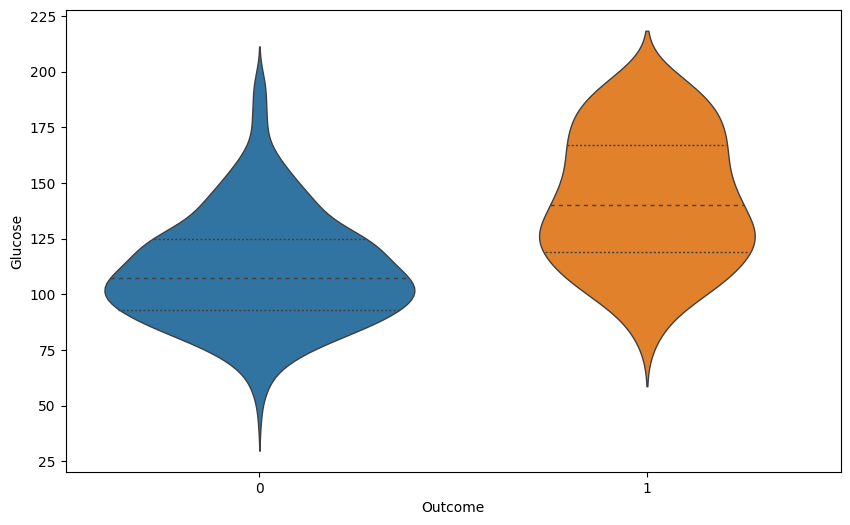

In [44]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Outcome", y="Glucose",
               split=True, inner="quart", linewidth=1)

#The chances of diabetes is gradually increasing with level of Glucose.

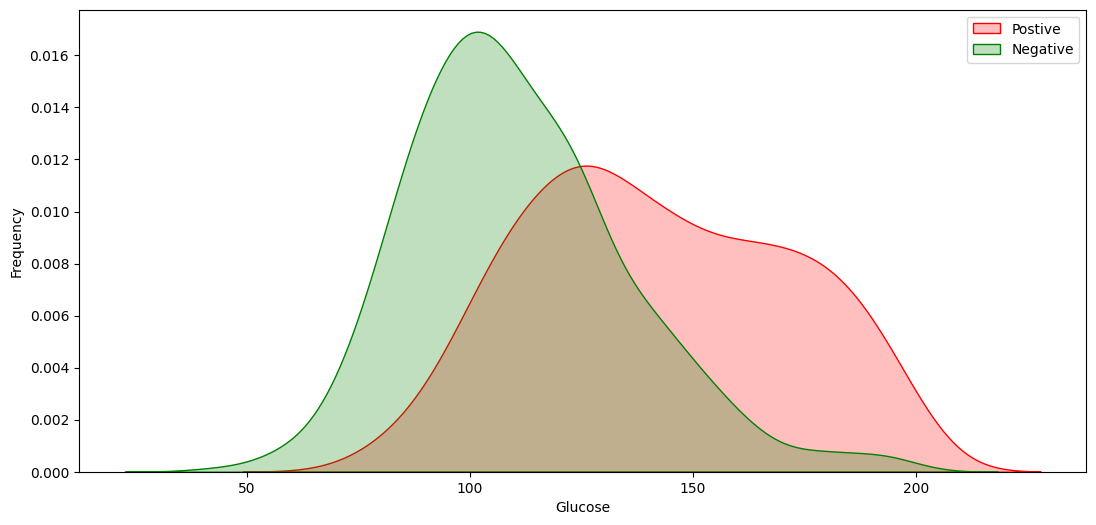

In [45]:
#Explore Glucose vs Outcome
plt.figure(figsize=(13,6))
g=sns.kdeplot(df["Glucose"][df["Outcome"]==1], color="Red", fill=True)
g=sns.kdeplot(df["Glucose"][df["Outcome"]==0],ax=g, color="Green", fill=True)
g.set_ylabel("Glucose")
g.set_ylabel("Frequency")
g.legend(["Postive","Negative"])

<Axes: xlabel='Glucose', ylabel='BMI'>

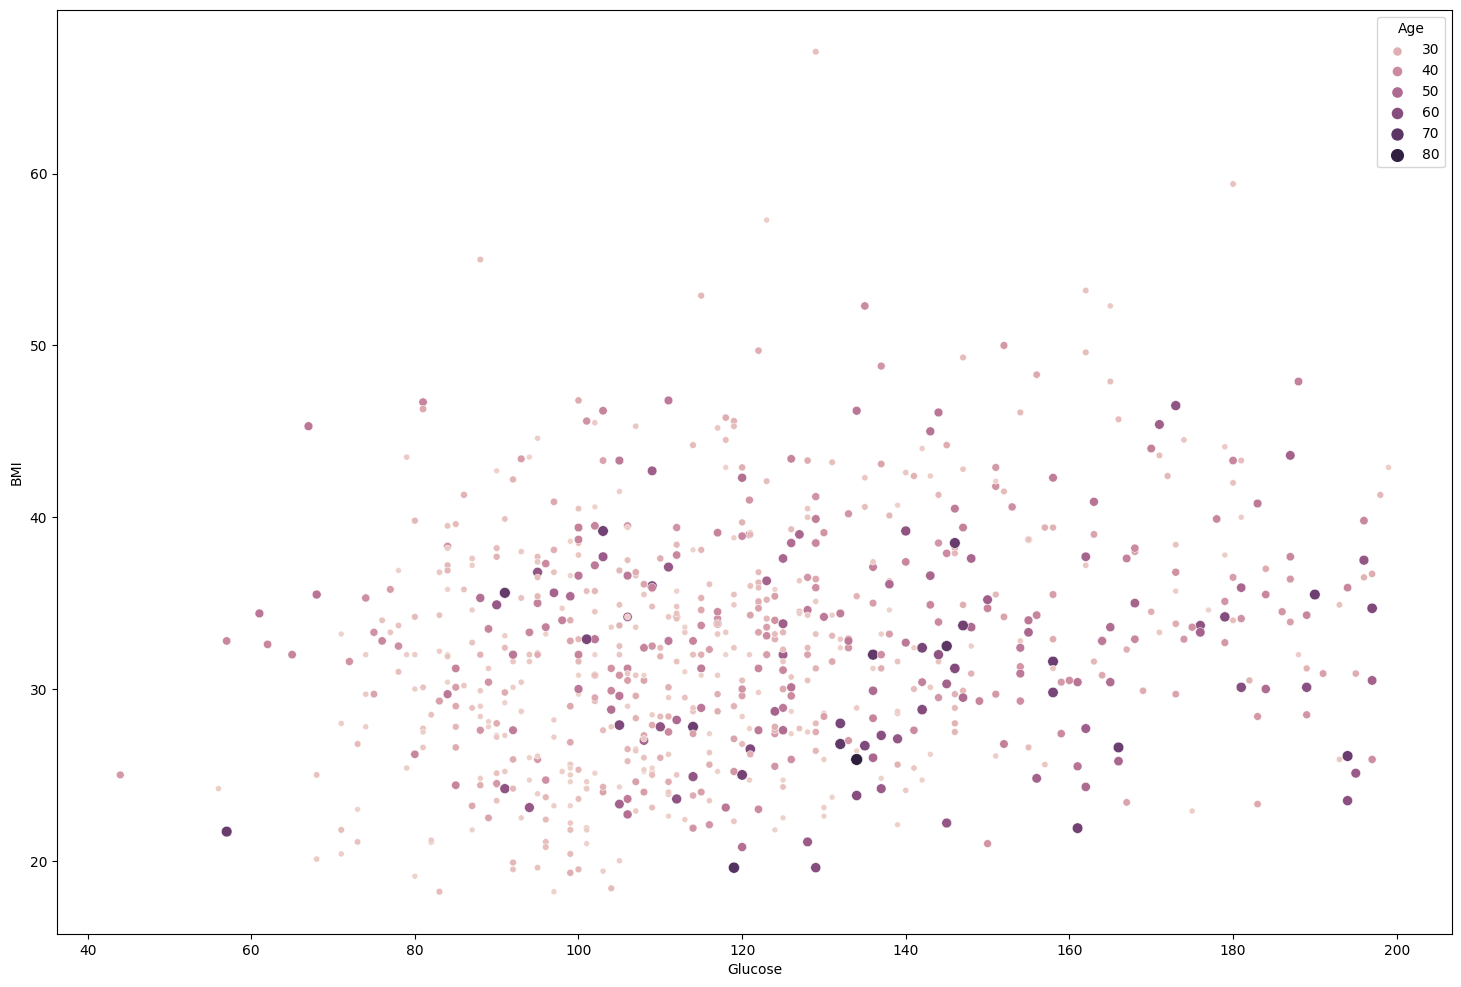

In [46]:
#Glucose vs BMI vs Age
plt.figure(figsize=(18, 12))
sns.scatterplot(data=df, x="Glucose",y="BMI", hue="Age", size="Age")

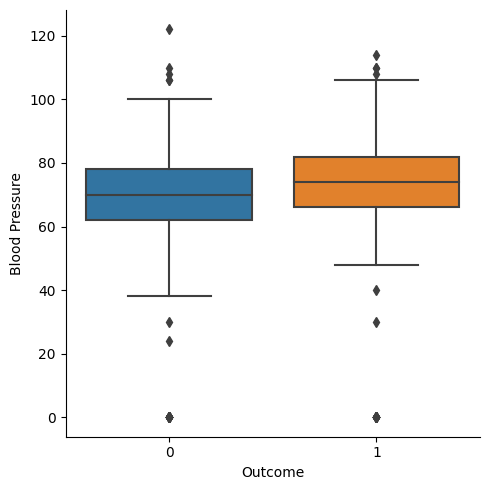

In [47]:
#Explore Age vs Sex, Parch, Pclass, SibSp
g=sns.catplot(y="BloodPressure", x="Outcome",data=df,kind="box")
g.set_ylabels("Blood Pressure")
g.set_xlabels("Outcome")

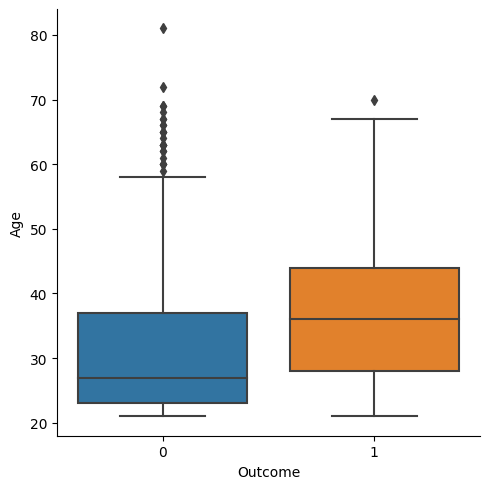

In [48]:
#Explore Age
g = sns.catplot(y="Age",x="Outcome",data=df,kind="box")
g.set_ylabels("Age")
g.set_xlabels("Outcome")

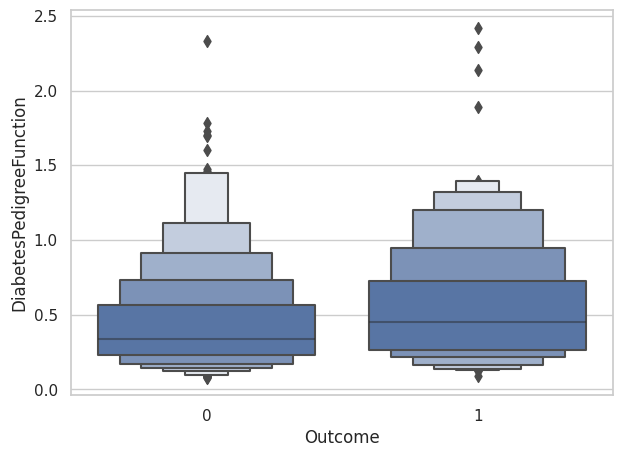

In [49]:
#DiabetesPedigreeFunction
sns.set_theme(style="whitegrid")
plt.figure(figsize=(7,5))
sns.boxenplot(x="Outcome",y="DiabetesPedigreeFunction",
              color="b",
              scale="linear", data=df)
g.set_ylabels("Diabetes Pedigree Function")
g.set_xlabels("Outcome")

In [50]:
def detect_outliers(df,n,features):
    outlier_indices = []
    """
    Detect outliers from given list of features. It returns a list of the indices
    according to the observations containing more than n outliers according
    to the Tukey method
    """
    # iterate over features(columns)
    for col in features:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from numeric features
outliers_to_drop = detect_outliers(df, 2 ,["Pregnancies", 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'SkinThickness', 'Insulin', 'Age'])

In [51]:
df.loc [outliers_to_drop] #show outliers rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0,129.0,110,46,130.0,67.1,0.319,26,1
445,0,180.0,78,63,14.0,59.4,2.420,25,1
370,3,173.0,82,48,465.0,38.4,2.137,25,1


In [52]:
df.drop(df.loc [outliers_to_drop].index, inplace=True)

In [53]:
q  = QuantileTransformer()
X = q.fit_transform(df)
transformedDF = q.transform(X)
transformedDF = pd.DataFrame(X)
transformedDF.columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 
 'DiabetesPedigreeFunction', 'Age', 'Outcome']

/home/joshua/.local/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2627: UserWarning: n_quantiles (1000) is greater than the total number of samples (765). n_quantiles is set to n_samples.
  warnings.warn(
/home/joshua/.local/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


In [54]:
transformedDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.746728,0.812173,0.518979,0.804974,0.255890,0.593586,0.752618,0.889398,1.0
1,0.230366,0.091623,0.336387,0.645942,0.255890,0.214005,0.476440,0.556937,0.0
2,0.863220,0.956806,0.280105,0.358639,0.255890,0.077880,0.784031,0.582461,1.0
3,0.230366,0.125654,0.336387,0.358639,0.662958,0.285340,0.106675,0.000000,0.0
4,0.000000,0.723168,0.051047,0.804974,0.834424,0.929319,0.998691,0.604712,1.0


In [55]:
##Separate train dataset and test dataset
features=df.drop(["Outcome"],axis=1)
labels=df["Outcome"]
x_train, x_test, y_train, y_test=train_test_split(features, labels, test_size=0.30, random_state=7)


In [56]:
#Cross validate Models
def evaluate_model(models):
    """
    Takes a list of models and returns chart of cross validation scores using mean accuracy
    """
    
    # Cross validate model with Kfold stratified cross val
    kfold = StratifiedKFold(n_splits = 10)
    
    result = []
    for model in models :
        result.append(cross_val_score(estimator = model, X = x_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

    cv_means = []
    cv_std = []
    for cv_result in result:
        cv_means.append(cv_result.mean())
        cv_std.append(cv_result.std())

    result_df = pd.DataFrame({
        "CrossValMeans":cv_means,
        "CrossValerrors": cv_std,
        "Models":[
            "LogisticRegression",
            "DecisionTreeClassifier",
            "AdaBoostClassifier",
            "SVC",
            "RandomForestClassifier",
            "GradientBoostingClassifier",
            "KNeighborsClassifier"
        ]
    })

    # Generate chart
    bar = sns.barplot(x = "CrossValMeans", y = "Models", data = result_df, orient = "h")
    bar.set_xlabel("Mean Accuracy")
    bar.set_title("Cross validation scores")
    return result_df


,CrossValMeans,CrossValerrors,Models
0,0.764780,0.065273,LogisticRegression
1,0.704997,0.089117,DecisionTreeClassifier
2,0.695632,0.077231,AdaBoostClassifier
3,0.764675,0.054994,SVC
4,0.753529,0.074166,RandomForestClassifier
5,0.729350,0.092941,GradientBoostingClassifier
6,0.719951,0.087703,KNeighborsClassifier


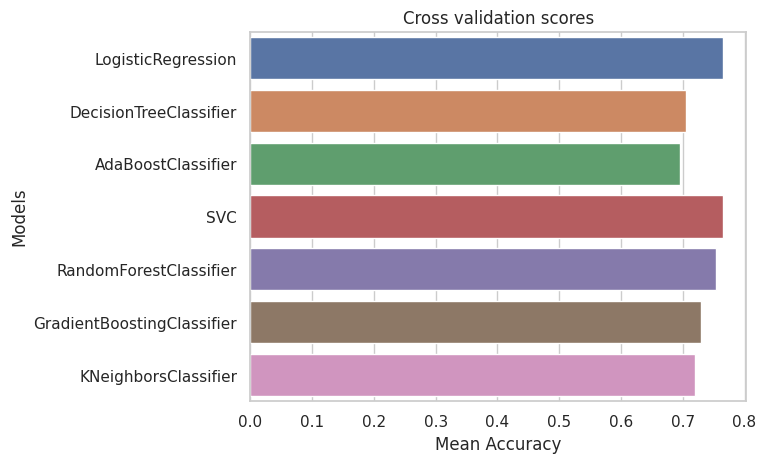

In [57]:
# Modeling step Test differents algorithms 
random_state = 30
models = [
    LogisticRegression(random_state = random_state, solver='liblinear'),
    DecisionTreeClassifier(random_state = random_state),
    AdaBoostClassifier(DecisionTreeClassifier(random_state = random_state), random_state = random_state, learning_rate = 0.2),
    SVC(random_state = random_state),
    RandomForestClassifier(random_state = random_state),
    GradientBoostingClassifier(random_state = random_state),
    KNeighborsClassifier(),
]
evaluate_model(models)

In [59]:
#According to the above observation, I have found that SVC, RandomForestClassifier, and LogisticRegression
#model has more accuracy 
#Next, I will do hyper parameter tuning on three models

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [63]:
def analyze_grid_result(grid_result):
    '''
    Analysis of GridCV result and predicting with test dataset
    Show classification report at last
    '''

    # Best parameters and accuracy
    print("Tuned hyperparameters: (best parameters) ", grid_result.best_params_)
    print("Accuracy :", grid_result.best_score_)
    
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, grid_result.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, grid_result.predict(x_test)
    print(classification_report(y_true, y_pred))
    print()

In [65]:
# Define models and parameters for LogisticRegression
model = LogisticRegression(solver='liblinear')
solvers = ['newton-cg', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# Define grid search
grid = dict(solver = solvers, penalty 
= penalty, C = c_values)
cv = StratifiedKFold(n_splits = 50, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = cv, scoring = 'accuracy', error_score = 0)
logi_result = grid_search.fit(x_train, y_train)

# Logistic Regression Hyperparameter Result
analyze_grid_result(logi_result)

Tuned hyperparameters: (best parameters)  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy : 0.792
0.785 (+/-0.243) for {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.785 (+/-0.243) for {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.785 (+/-0.243) for {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.792 (+/-0.238) for {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.787 (+/-0.248) for {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.775 (+/-0.243) for {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.783 (+/-0.251) for {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.724 (+/-0.237) for {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.782 (+/-0.215) for {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.701 (+/-0.232) for {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       147
           1       0.68     

In [66]:
# Defining models and parameters for LogisticRegression
model = SVC()

# Define grid search

tuned_parameters = [
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
    {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
]
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
scv_result = grid_search.fit(x_train, y_train)

# SVC Hyperparameter Result
analyze_grid_result(scv_result)

Tuned hyperparameters: (best parameters)  {'C': 10, 'kernel': 'linear'}
Accuracy : 0.7888017776287104
0.725 (+/-0.057) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.738 (+/-0.046) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.664 (+/-0.031) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.721 (+/-0.020) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.647 (+/-0.013) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.703 (+/-0.050) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.654 (+/-0.013) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.669 (+/-0.057) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.781 (+/-0.025) for {'C': 1, 'kernel': 'linear'}
0.789 (+/-0.018) for {'C': 10, 'kernel': 'linear'}
0.779 (+/-0.029) for {'C': 100, 'kernel': 'linear'}
0.768 (+/-0.022) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       147
           1       0.68      

In [67]:
# Define models and parameters for LogisticRegression
model = RandomForestClassifier(random_state=42)


# Define grid search
tuned_parameters = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
cv = StratifiedKFold(n_splits = 2, random_state = 1, shuffle = True)
grid_search = GridSearchCV(estimator = model, param_grid = tuned_parameters, cv = cv, scoring = 'accuracy', error_score = 0)
grid_result = grid_search.fit(x_train, y_train)

# SVC Hyperparameter Result
analyze_grid_result(grid_result)

/home/joshua/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/joshua/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/joshua/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the 

Tuned hyperparameters: (best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'log2', 'n_estimators': 200}
Accuracy : 0.7663717927217844
0.755 (+/-0.033) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 200}
0.757 (+/-0.022) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 500}
0.755 (+/-0.033) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 200}
0.757 (+/-0.022) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 500}
0.755 (+/-0.025) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 200}
0.761 (+/-0.029) for {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
0.759 (+/-0.033) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 200}
0.759 (+/-0.025) for {'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 500}
0.759 (+/-

In [ ]:
y_pred=logi_result.predict(x_test)
print(classification_report(y_test, y_pred))


In [ ]:
x_test['pred']=y_pred
x_test